# Titanic - Machine Learning from Disaster

## Установка зависимостей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns



## Описание данных

- PassengerId - id пассажира
- Pclass - класс обслуживания билета (1 = первый, 2 = второй, 3 = третий)
- Name - имя пассажира
- Sex - пол пассажира
- Age - возраст пассажира
- SibSp - семейные отношения sibling/spouse)
- Parch - семейные отношения parent/child.
- Ticket - номер билета
- Fare - стоимость билета
- Cabin - номер кабины
- Embarked - Порт посадки. (C = Шербур, Q = Квинстаун, S = Саутгемптон)

Целевая переменная:
- Survived - Выжил человек или нет. 0 = Нет, 1 = Да.

## Загрузка датасета

In [2]:
train_data = pd.read_csv("../data/train.csv", index_col="PassengerId")
test_data = pd.read_csv("../data/test.csv", index_col="PassengerId")

In [3]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Анализ и предобработка данных

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### Борьба с пропусками

In [8]:
data_nulls = train_data.isna().sum()
data_nulls

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
test_data_nulls = test_data.isna().sum()
test_data_nulls

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<BarContainer object of 11 artists>

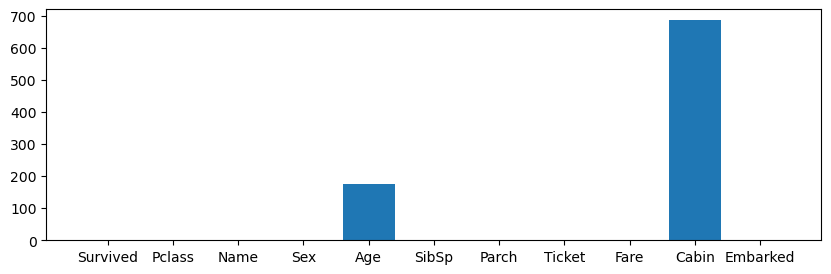

In [10]:
plt.figure(figsize=(10, 3))
plt.bar(data_nulls.index, data_nulls.values)

<Axes: xlabel='Age', ylabel='Count'>

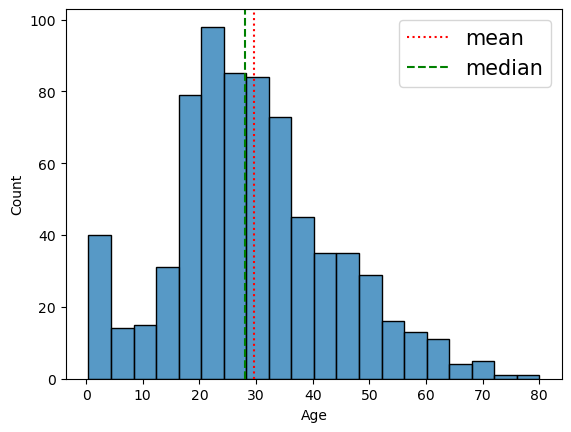

In [11]:
mean_Age = np.mean(train_data['Age'].dropna().values)
median_Age = np.quantile(train_data['Age'].dropna().values,q=0.5)
plt.axvline(x=mean_Age, color='r', linestyle = ':', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')
plt.legend(fontsize=15)
sns.histplot(train_data['Age'])

<Axes: xlabel='Cabin', ylabel='Count'>

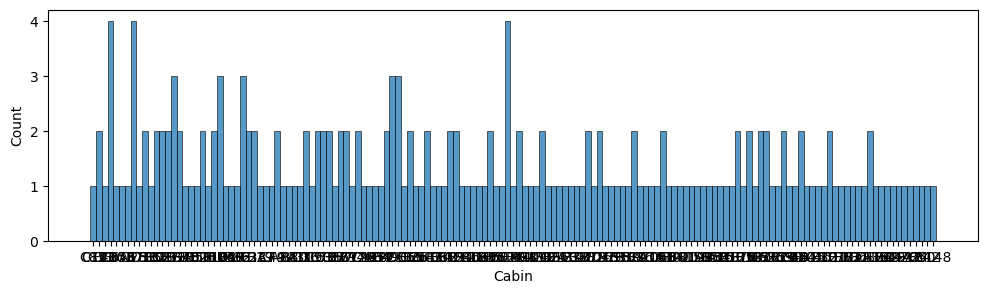

In [12]:
plt.figure(figsize=(12, 3))
sns.histplot(train_data['Cabin'])

<Axes: xlabel='Embarked', ylabel='Count'>

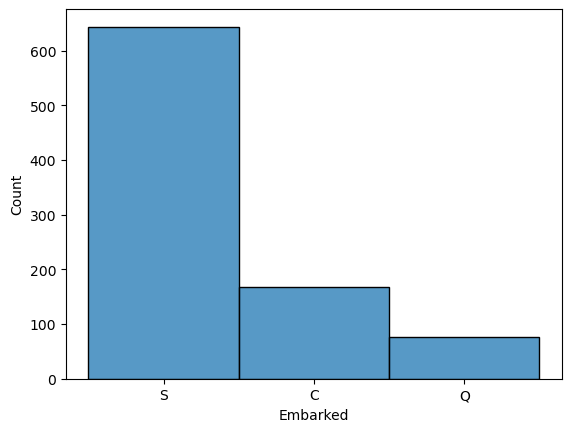

In [13]:
sns.histplot(train_data['Embarked'])

В датасете около 20% пропусков в Age, что мало для того, чтобы дропнуть столбец и много, чтобы дропнуть строчки с нулями в признаке.
Поэтому будем заполнять пропуски медианной, но по группам. Тем более, что она примерно совпадает с модой распределения.
Столбец Cabin будет проще удалить, т.к. очень много пропусков и уникальных значений, но сделаем новый признак IsCabin.
И также две строчки с пустыми Embarked заполним модами.Там более, что у нас и так ощутимое смещение в значение S. Мы не сделаем данные грязнее, при этом сохраним все строки.

In [14]:
train_data = train_data.fillna(train_data['Age'].median())
test_data = test_data.fillna(train_data['Age'].median())

In [15]:
train_data["IsCabin"] = train_data["Cabin"].isna()
test_data["IsCabin"] = test_data["Cabin"].isna()
train_data = train_data.drop('Cabin', axis=1)
test_data = test_data.drop('Cabin', axis=1)

In [16]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [17]:
data_nulls = train_data.isna().sum()
data_nulls

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
IsCabin     0
dtype: int64

In [18]:
test_data.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
IsCabin     0
dtype: int64

### Обработка 'Name'

В первоначальном виде столбец нельзя использовать, т.к. все данные уникальны. Но можно извлечь из него титулы.

In [19]:
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    
#Соберем все редкие титулы в один. И повторы типо Ms - Miss схлопнем. 
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    #Удаляем Name
    dataset.drop("Name", axis=1, inplace = True)

train_data['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

Также удалим колонку "Ticket"

In [20]:
for dataset in [train_data, test_data]:
    dataset.drop("Ticket", axis=1, inplace = True)

## Первая пробная модель - CatBoost

Попробуем обучить Титаник, пока не начал обрабатывать категориальные признаки и делать нормализацию.

In [21]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsCabin,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False,Mr
2,1,1,female,38.0,1,0,71.2833,C,False,Mrs
3,1,3,female,26.0,0,0,7.9250,S,False,Miss
4,1,1,female,35.0,1,0,53.1000,S,False,Mrs
5,0,3,male,35.0,0,0,8.0500,S,False,Mr


In [23]:
y = train_data['Survived']
X = train_data.drop('Survived', axis=1)
X_text = test_data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsCabin']

In [25]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    random_seed=42,
    verbose=100,
    eval_metric='Accuracy'
)

In [26]:
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50,
    use_best_model=True,
)

CatBoostError: Invalid type for cat_feature[non-default value idx=562,feature_idx=6]=28.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [ ]:
y_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

In [ ]:
# Важность признаков
feature_importance = model.get_feature_importance()
feature_names = X.columns

for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.2f}")

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title('CatBoost Feature Importance')
plt.show()

In [ ]:
# Предсказания для submission
test_predictions = model.predict(X_text)

# Создаем файл для Kaggle
submission = pd.DataFrame({
    'PassengerId': test_data.index,
    'Survived': test_predictions
})

submission.to_csv('../data/catboost_baseline.csv', index=False)
print("Submission file created!")

**Test score:** 0.79186

### Обработка категориальных признаков